In [1]:
import pandas as pd
import warnings 
import numpy as np
from matplotlib import rc, rcParams

warnings.filterwarnings(action='ignore')
rc('font',family='AppleGothic')
rcParams['axes.unicode_minus']=False

In [2]:
path = './data_임대보증금임대료/'

train = pd.read_csv(path+'train_new.csv')
test = pd.read_csv(path+'test_new.csv')

train.shape, test.shape

((3184, 68), (776, 68))

EDA 결과 : '지역_lb', '총세대수', '버스정류장수', '단지내주차면수', '전용면적', '공급유형_lb','ERROR1_lb','자격유형_lb'가 임대보증금과 임대료에 영향을 미칠 것 같다

array([[<AxesSubplot:title={'center':'총세대수'}>,
        <AxesSubplot:title={'center':'전용면적'}>,
        <AxesSubplot:title={'center':'전용면적별세대수'}>],
       [<AxesSubplot:title={'center':'공가수'}>,
        <AxesSubplot:title={'center':'임대보증금'}>,
        <AxesSubplot:title={'center':'임대료'}>],
       [<AxesSubplot:title={'center':'지하철'}>,
        <AxesSubplot:title={'center':'버스정류장'}>,
        <AxesSubplot:title={'center':'단지내주차면수'}>]], dtype=object)

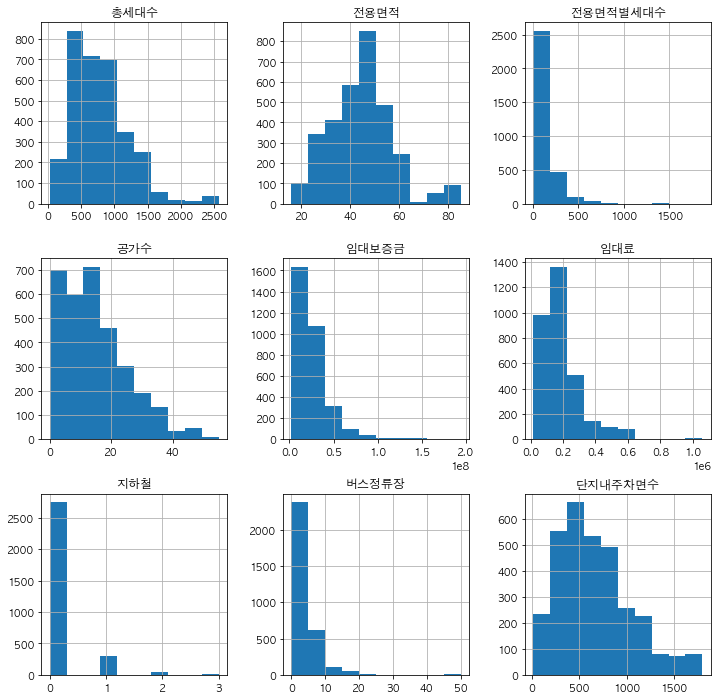

In [3]:
train[[ '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수']].hist(figsize=(12,12))

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

## 임대보증금 예측
### no.1~4

In [5]:
sel = ['지역_lb', '총세대수', '버스정류장', '단지내주차면수', '전용면적', '공급유형_lb','자격유형_lb']

X = train[sel]
y = train[['임대보증금']]

# 피처스케일링
scaler = StandardScaler()
X_nor = scaler.fit_transform(X)

# 모델 _ohx : one-hot-encoding
lr = LinearRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

# 회귀는 교차검증
lr_scores = cross_val_score(lr, X_nor, y,scoring='neg_mean_absolute_error', cv=5) 
knn_scores = cross_val_score(knn, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
rf_scores = cross_val_score(rf, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
dt_scores = cross_val_score(dt, X_nor, y,scoring='neg_mean_absolute_error', cv=5)

lr_score = np.abs(lr_scores.mean())
knn_score = np.abs(knn_scores.mean())
rf_score = np.abs(rf_scores.mean())
dt_score = np.abs(dt_scores.mean())

print("LinearRegression : ", lr_score)
print("KNeighborsRegressor : ", knn_score)
print("RandomForestRegressor : ", rf_score)
print("DecisionTreeRegressor : ", dt_score)

score_std = [lr_score, knn_score, rf_score, dt_score ]
print(score_std)

LinearRegression :  8586536.182271998
KNeighborsRegressor :  7875079.724356507
RandomForestRegressor :  6800326.270501008
DecisionTreeRegressor :  8417419.75379218
[8586536.182271998, 7875079.724356507, 6800326.270501008, 8417419.75379218]


### no. 5~8

In [6]:
sel = ['지역_lb', '총세대수', '버스정류장', '단지내주차면수', '전용면적', '공급유형_lb','자격유형_lb']

X = train[sel]
y = train[['임대보증금']]

# 피처스케일링
scaler = MinMaxScaler()
X_nor = scaler.fit_transform(X)

# 모델 _ohx : one-hot-encoding
lr = LinearRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

# 회귀는 교차검증
lr_scores = cross_val_score(lr, X_nor, y,scoring='neg_mean_absolute_error', cv=5) 
knn_scores = cross_val_score(knn, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
rf_scores = cross_val_score(rf, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
dt_scores = cross_val_score(dt, X_nor, y,scoring='neg_mean_absolute_error', cv=5)

lr_score = np.abs(lr_scores.mean())
knn_score = np.abs(knn_scores.mean())
rf_score = np.abs(rf_scores.mean())
dt_score = np.abs(dt_scores.mean())

print("LinearRegression : ", lr_score)
print("KNeighborsRegressor : ", knn_score)
print("RandomForestRegressor : ", rf_score)
print("DecisionTreeRegressor : ", dt_score)

score_std = [lr_score, knn_score, rf_score, dt_score ]
print(score_std)

LinearRegression :  8586536.182271972
KNeighborsRegressor :  7701855.0501861125
RandomForestRegressor :  6910824.88293759
DecisionTreeRegressor :  8500804.315070974
[8586536.182271972, 7701855.0501861125, 6910824.88293759, 8500804.315070974]


### no.13~16

In [7]:
# 지역_lb, 공급유형_lb, 자격유형_lb → 원핫인코딩 피처로
sel = ['총세대수', '버스정류장', '단지내주차면수', '전용면적', 
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', 
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택',
       'A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

X = train[sel]
y = train[['임대보증금']]

# 피처스케일링
scaler = MinMaxScaler()
X_nor = scaler.fit_transform(X)

# one-hot-encoding
lr = LinearRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

# 회귀는 교차검증
lr_scores = cross_val_score(lr, X_nor, y,scoring='neg_mean_absolute_error', cv=5) 
knn_scores = cross_val_score(knn, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
rf_scores = cross_val_score(rf, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
dt_scores = cross_val_score(dt, X_nor, y,scoring='neg_mean_absolute_error', cv=5)

lr_score = np.abs(lr_scores.mean())
knn_score = np.abs(knn_scores.mean())
rf_score = np.abs(rf_scores.mean())
dt_score = np.abs(dt_scores.mean())

print("LinearRegression : ", lr_score)
print("KNeighborsRegressor : ", knn_score)
print("RandomForestRegressor : ", rf_score)
print("DecisionTreeRegressor : ", dt_score)

score_std = [lr_score, knn_score, rf_score, dt_score ]
print(score_std)

LinearRegression :  4.000781074376444e+17
KNeighborsRegressor :  6460725.886298786
RandomForestRegressor :  5935173.613005368
DecisionTreeRegressor :  7063343.71395002
[4.000781074376444e+17, 6460725.886298786, 5935173.613005368, 7063343.71395002]


### no.9~12

In [8]:
# 지역_lb, 공급유형_lb, 자격유형_lb → 원핫인코딩 피처로
sel = ['총세대수', '버스정류장', '단지내주차면수', '전용면적', 
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', 
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택',
       'A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

X = train[sel]
y = train[['임대보증금']]

# 피처스케일링
scaler = StandardScaler()
X_nor = scaler.fit_transform(X)

# one-hot-encoding
lr = LinearRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

# 회귀는 교차검증
lr_scores = cross_val_score(lr, X_nor, y,scoring='neg_mean_absolute_error', cv=5) 
knn_scores = cross_val_score(knn, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
rf_scores = cross_val_score(rf, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
dt_scores = cross_val_score(dt, X_nor, y,scoring='neg_mean_absolute_error', cv=5)

lr_score = np.abs(lr_scores.mean())
knn_score = np.abs(knn_scores.mean())
rf_score = np.abs(rf_scores.mean())
dt_score = np.abs(dt_scores.mean())

print("LinearRegression : ", lr_score)
print("KNeighborsRegressor : ", knn_score)
print("RandomForestRegressor : ", rf_score)
print("DecisionTreeRegressor : ", dt_score)

score_std = [lr_score, knn_score, rf_score, dt_score ]
print(score_std)

LinearRegression :  4.777383285774829e+17
KNeighborsRegressor :  7178019.814499965
RandomForestRegressor :  5959684.918154083
DecisionTreeRegressor :  7087224.605544202
[4.777383285774829e+17, 7178019.814499965, 5959684.918154083, 7087224.605544202]


### no.17

In [9]:
# 지역_lb, 공급유형_lb, 자격유형_lb → 원핫인코딩 피처로
sel = ['총세대수', '버스정류장', '단지내주차면수', '전용면적', 
       '서울특별시',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택',
       'A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

X = train[sel]
y = train[['임대보증금']]

# 피처스케일링
scaler = StandardScaler()
X_nor = scaler.fit_transform(X)

# one-hot-encoding
rf = RandomForestRegressor()

# 회귀는 교차검증
rf_scores = cross_val_score(rf, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
rf_score = np.abs(rf_scores.mean())
print("RandomForestRegressor : ", rf_score)

RandomForestRegressor :  6708965.863668632


### no.18

In [10]:
# 지역_lb, 공급유형_lb, 자격유형_lb → 원핫인코딩 피처로
sel = ['총세대수', '버스정류장', '단지내주차면수', '전용면적', 
       '서울특별시',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택',
       'A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

X = train[sel]
y = train[['임대보증금']]

# 피처스케일링
scaler = MinMaxScaler() 
X_nor = scaler.fit_transform(X)

# one-hot-encoding
rf = RandomForestRegressor()

# 회귀는 교차검증
rf_scores = cross_val_score(rf, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
rf_score = np.abs(rf_scores.mean())
print("RandomForestRegressor : ", rf_score)

RandomForestRegressor :  6657531.442261135


### no.19~20

In [11]:
# 지역_lb, 공급유형_lb, 자격유형_lb → 원핫인코딩 피처로
sel = ['총세대수', '버스정류장', '단지내주차면수', '전용면적', 
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', 
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택']
       
X = train[sel]
y = train[['임대보증금']]

# 피처스케일링
scaler = MinMaxScaler() # StandardScaler
X_nor = scaler.fit_transform(X)

# one-hot-encoding
lr = LinearRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

# 회귀는 교차검증
lr_scores = cross_val_score(lr, X_nor, y,scoring='neg_mean_absolute_error', cv=5) 
knn_scores = cross_val_score(knn, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
rf_scores = cross_val_score(rf, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
dt_scores = cross_val_score(dt, X_nor, y,scoring='neg_mean_absolute_error', cv=5)

lr_score = np.abs(lr_scores.mean())
knn_score = np.abs(knn_scores.mean())
rf_score = np.abs(rf_scores.mean())
dt_score = np.abs(dt_scores.mean())

print("LinearRegression : ", lr_score)
print("KNeighborsRegressor : ", knn_score)
print("RandomForestRegressor : ", rf_score)
print("DecisionTreeRegressor : ", dt_score)

score_std = [lr_score, knn_score, rf_score, dt_score ]
print(score_std)

LinearRegression :  6570142723044650.0
KNeighborsRegressor :  8441680.126536537
RandomForestRegressor :  8400239.286398413
DecisionTreeRegressor :  9988327.914556244
[6570142723044650.0, 8441680.126536537, 8400239.286398413, 9988327.914556244]


### cross_val_score 사용 유무에 따라 MAE 확인

In [12]:
# 지은님 모델
from sklearn.model_selection import train_test_split

sel = ['지역_lb', '총세대수', '전용면적','버스정류장','단지내주차면수', '공급유형_lb']
X = train[sel] #입력
y = train['임대보증금'] #출력

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=0)

model = RandomForestRegressor(n_estimators=5, random_state=0, n_jobs=-1) # 5개의 트리
model.fit(X_train, y_train)

pred = model.predict(X_test) #X_test 값을 가지고 y_test를 예측해봐 
# pred

# mae
mae = np.mean( np.abs(y_test - pred)  )
print(mae)
# mse
mse_val = np.mean( (y_test - pred)**2  )
print(mse_val)

rf_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=3)
rf_score = np.abs(rf_scores.mean())
print("RandomForestRegressor : ", rf_score)

4200766.153616259
93572359485885.66
RandomForestRegressor :  8863170.976332009


In [13]:
# 지은님 모델
sel = ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도', '총세대수', '전용면적','버스정류장','단지내주차면수',
      '공급유형_lb'] #공급유형은 원핫인코딩 한걸로 바꿀것임 

X = train[sel]
y = train['임대보증금']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=0)

model_deposit = RandomForestRegressor(n_estimators=5, random_state=0, n_jobs=-1) # 5개의 트리
model_deposit.fit(X_train, y_train)

pred = model_deposit.predict(X_test) 
# pred

# mae
mae = np.mean( np.abs(y_test - pred)  )
print(mae)
# mse
mse_val = np.mean( (y_test - pred)**2  )
print(mse_val)

rf_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=3)
rf_score = np.abs(rf_scores.mean())
print("RandomForestRegressor : ", rf_score)


3697216.8509663283
77794858834076.1
RandomForestRegressor :  8263704.740070987


> 모델 평가를 위해 cross_val_score을 공통적으로 사용하는게 좋겠다!

### no.24

In [14]:
sel = ['총세대수', '버스정류장', '단지내주차면수', '전용면적',
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', 
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택','자격유형_lb']


X = train[sel]
y = train[['임대보증금']]

# 피처스케일링
scaler = MinMaxScaler()
X_nor = scaler.fit_transform(X)

# one-hot-encoding
rf = RandomForestRegressor()

# 회귀는 교차검증
rf_scores = cross_val_score(rf, X_nor, y,scoring='neg_mean_absolute_error', cv=5)

rf_score = np.abs(rf_scores.mean())

print("RandomForestRegressor : ", rf_score)

RandomForestRegressor :  6597640.454108892


### no.25

In [15]:
sel = ['총세대수', '버스정류장', '단지내주차면수', '전용면적', 
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', 
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택',
       'A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O','전용면적별세대수']

# 피처스케일링
scaler = MinMaxScaler() #   StandardScaler
X_nor = scaler.fit_transform(X)

# one-hot-encoding
rf = RandomForestRegressor()

# 회귀는 교차검증
rf_scores = cross_val_score(rf, X_nor, y,scoring='neg_mean_absolute_error', cv=5)

rf_score = np.abs(rf_scores.mean())

print("RandomForestRegressor : ", rf_score)

RandomForestRegressor :  6598167.6039072275


### no.26

In [16]:
sel = ['총세대수', '버스정류장', '단지내주차면수', '전용면적', 
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', 
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       'A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

X = train[sel]
y = train[['임대보증금']]

# 피처스케일링
scaler = MinMaxScaler()
X_nor = scaler.fit_transform(X)

# one-hot-encoding
rf = RandomForestRegressor()

# 회귀는 교차검증
rf_scores = cross_val_score(rf, X_nor, y,scoring='neg_mean_absolute_error', cv=5)

rf_score = np.abs(rf_scores.mean())

print("RandomForestRegressor : ", rf_score)

RandomForestRegressor :  6274272.619108258


### no.27
- 수치형 피처 PolynomialFeatures 사용
- 수치형 피처 : ['총세대수', '버스정류장', '단지내주차면수', '전용면적'] 

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge


sel = ['총세대수', '버스정류장', '단지내주차면수', '전용면적', 
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', 
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택',
       'A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

X = train[sel]
y = train[['임대보증금']]

# 피처스케일링
scaler = MinMaxScaler() #  StandardScaler
X_nor = scaler.fit_transform(X)
print("기존 X_nor의 shape : ", X_nor.shape)
tmp_X_nor = X_nor[:,:4]
# print(tmp_X_nor)

# polynomial features
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(tmp_X_nor)  
print("수치형 피처 polynomial X_nor의 shape : ", X_poly.shape)
# print(X_poly[:,:4])

X_all = np.concatenate((X_poly, X_nor[:,4:]), axis=1)
print('수치형 피처 polynomial + 기존 원핫인코딩 피처의 shape', X_all.shape)

# one-hot-encoding
knn = KNeighborsRegressor()
rf = RandomForestRegressor()

# 회귀는 교차검증
knn_scores = cross_val_score(knn, X_all, y,scoring='neg_mean_absolute_error', cv=5)
rf_scores = cross_val_score(rf, X_all, y,scoring='neg_mean_absolute_error', cv=5)

knn_score = np.abs(knn_scores.mean())
rf_score = np.abs(rf_scores.mean())

print("KNeighborsRegressor : ", knn_score)
print("RandomForestRegressor : ", rf_score)

# Ridge, Lasso
lasso = Lasso()
ridge = Ridge()
lasso_scores = cross_val_score(lasso, X_all, y,scoring='neg_mean_absolute_error', cv=5)
ridge_scores = cross_val_score(ridge, X_all, y,scoring='neg_mean_absolute_error', cv=5)

lasso_score = np.abs(lasso_scores.mean())
ridge_score = np.abs(ridge_scores.mean())

print("Lasso (alpha=defalt) : ", lasso_score)
print("Ridge (alpha=defalt) : ", ridge_score)


기존 X_nor의 shape :  (3184, 45)
수치형 피처 polynomial X_nor의 shape :  (3184, 14)
수치형 피처 polynomial + 기존 원핫인코딩 피처의 shape (3184, 55)
KNeighborsRegressor :  6433068.1036501685
RandomForestRegressor :  6133701.667466899
Lasso (alpha=defalt) :  5948604.232416378
Ridge (alpha=defalt) :  5820730.975379599


In [18]:
# alpha 값 바꾸어가면서 확인

alphas = [10, 5, 1, 0.1, 0.01,0.001, 0.0001]
for a in alphas :
    
    lasso = Lasso(alpha=a)
    ridge = Ridge(alpha=a)
    lasso_scores = cross_val_score(lasso, X_all, y,scoring='neg_mean_absolute_error', cv=5)
    ridge_scores = cross_val_score(ridge, X_all, y,scoring='neg_mean_absolute_error', cv=5)

    lasso_score = np.abs(lasso_scores.mean())
    ridge_score = np.abs(ridge_scores.mean())

    print(f"Lasso (alpha={a}) : ", lasso_score)
    print(f"Ridge (alpha={a}) : ", ridge_score)
    
# alpha = 5

Lasso (alpha=10) :  5947224.945680676
Ridge (alpha=10) :  5885874.774705446
Lasso (alpha=5) :  5947997.284707954
Ridge (alpha=5) :  5802541.374729417
Lasso (alpha=1) :  5948604.232416378
Ridge (alpha=1) :  5820730.975379599
Lasso (alpha=0.1) :  5948749.020987553
Ridge (alpha=0.1) :  5881872.139049034
Lasso (alpha=0.01) :  5948763.483201747
Ridge (alpha=0.01) :  5926068.705645996
Lasso (alpha=0.001) :  5948764.929217249
Ridge (alpha=0.001) :  5940347.064800157
Lasso (alpha=0.0001) :  5948765.07381457
Ridge (alpha=0.0001) :  5942672.792659899


In [19]:
for a in range(1, 10):
    
    ridge = Ridge(alpha=a)
    ridge_scores = cross_val_score(ridge, X_all, y,scoring='neg_mean_absolute_error', cv=5)
    ridge_score = np.abs(ridge_scores.mean())
    print(f"Ridge (alpha={a}) : ", ridge_score)

# alpha = 3

Ridge (alpha=1) :  5820730.975379599
Ridge (alpha=2) :  5798142.157615109
Ridge (alpha=3) :  5792203.071077065
Ridge (alpha=4) :  5793141.619933488
Ridge (alpha=5) :  5802541.374729417
Ridge (alpha=6) :  5814407.637169728
Ridge (alpha=7) :  5827726.833334526
Ridge (alpha=8) :  5845482.249056751
Ridge (alpha=9) :  5865489.943744595


In [20]:
ridge = Ridge(alpha=3)
ridge_scores = cross_val_score(ridge, X_all, y ,scoring='neg_mean_absolute_error', cv=5)
ridge_score = np.abs(ridge_scores.mean())
print(f"Ridge (alpha=3) : ", ridge_score)

Ridge (alpha=3) :  5792203.071077065


## no. 34
### xgboost 

In [21]:
import xgboost as xgb
import lightgbm as lgb
import time

In [22]:

sel = ['총세대수', '버스정류장', '단지내주차면수', '전용면적', 
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', 
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택',
       'A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

X = train[sel]
y = train[['임대보증금']]

# 피처스케일링
scaler = MinMaxScaler() #  StandardScaler MinMaxScaler
X_nor = scaler.fit_transform(X)
tmp_X_nor = X_nor[:,:4]

# polynomial features
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(tmp_X_nor)  

X_all = np.concatenate((X_poly, X_nor[:,4:]), axis=1)

# xgboost
data_dmatrix = xgb.DMatrix(data=X_all,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
            colsample_bytree = 0.3, # 각나무마다 사용하는 feature 비율
            learning_rate = 0.1,
            max_depth = 3, 
            alpha = 0.1, 
            n_estimators = 100)  # n_estimators=100

xg_reg.fit(X_all, y)
score = cross_val_score(xg_reg, X_all, y, cv=5, scoring="neg_mean_absolute_error")
m_score = np.abs(score.mean())  
print("Xgboost : {}".format(m_score)) 


[02:54:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c09

## no.35
### lightGBM


In [23]:

sel = ['총세대수', '버스정류장', '단지내주차면수', '전용면적', 
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', 
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택',
       'A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

X = train[sel]
y = train[['임대보증금']]

# 피처스케일링
scaler = MinMaxScaler() #  StandardScaler MinMaxScaler
X_nor = scaler.fit_transform(X)
tmp_X_nor = X_nor[:,:4]

# polynomial features
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(tmp_X_nor)  

X_all = np.concatenate((X_poly, X_nor[:,4:]), axis=1)

m_lgbm1 = lgb.LGBMRegressor()
m_lgbm1.fit(X_all, y)
score = cross_val_score(m_lgbm1, X_all, y, 
                        cv=5, scoring="neg_mean_absolute_error")

m_score = np.abs(score.mean())  # 절대값

print("LightGBM Score : {}".format(m_score))  # 점수

LightGBM Score : 6658781.960822436


## no.36
### lightgbm + hyperparameter tunning

In [24]:
hyperparameters = {'boosting_type': 'gbdt', 
                   'colsample_bytree': 0.7250136792694301, 
                   'is_unbalance': False, 
                   'learning_rate': 0.013227664889528229,
                   'min_child_samples': 20, 
                   'num_leaves': 56, 
                   'reg_alpha': 0.7543896477745794, 
                   'reg_lambda': 0.07152751159655985, 
                   'subsample_for_bin': 240000, 
                   'subsample': 0.5233384321711397, 
                   'n_estimators': 1093}

sel = ['총세대수', '버스정류장', '단지내주차면수', '전용면적', 
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', 
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택',
       'A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

X = train[sel]
y = train[['임대보증금']]

# 피처스케일링
scaler = MinMaxScaler() #  StandardScaler MinMaxScaler
X_nor = scaler.fit_transform(X)
tmp_X_nor = X_nor[:,:4]

# polynomial features
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(tmp_X_nor)  

X_all = np.concatenate((X_poly, X_nor[:,4:]), axis=1)

m_lgbm1 = lgb.LGBMRegressor(**hyperparameters)
m_lgbm1.fit(X_all, y)
score = cross_val_score(m_lgbm1, X_all, y, 
                        cv=5, scoring="neg_mean_absolute_error")

m_score = np.abs(score.mean())  # 절대값

print("LightGBM Score : {}".format(m_score))  # 점수

LightGBM Score : 6793866.460701111


## no.37
- 2021.07.26 update ERROR1_lb 추가

In [25]:

sel = ['총세대수', '버스정류장', '단지내주차면수', '전용면적', 
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', 
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택',
       'A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 
      '나머지', '분양상가', '분양아파트']

X = train[sel]
y = train[['임대보증금']]

# 피처스케일링
scaler = MinMaxScaler() #  StandardScaler MinMaxScaler
X_nor = scaler.fit_transform(X)
tmp_X_nor = X_nor[:,:4]

# polynomial features
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(tmp_X_nor)  

X_all = np.concatenate((X_poly, X_nor[:,4:]), axis=1)

# xgboost
data_dmatrix = xgb.DMatrix(data=X_all,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
            colsample_bytree = 0.3, # 각나무마다 사용하는 feature 비율
            learning_rate = 0.1,
            max_depth = 3, 
            alpha = 0.1, 
            n_estimators = 100)  # n_estimators=100

xg_reg.fit(X_all, y)
score = cross_val_score(xg_reg, X_all, y, cv=5, scoring="neg_mean_absolute_error")
m_score = np.abs(score.mean())  
print("Xgboost : {}".format(m_score)) 


[02:55:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:55:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:55:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:55:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:55:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c09

## no.38
- ERROR1_lb 중 '분양아파트'만 구별되는 특징이 있는 것 같아서 이 피처만 추가해봄

In [26]:

sel = ['총세대수', '버스정류장', '단지내주차면수', '전용면적', 
       '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', 
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택',
       'A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O','분양아파트']

X = train[sel]
y = train[['임대보증금']]

# 피처스케일링
scaler = MinMaxScaler() #  StandardScaler MinMaxScaler
X_nor = scaler.fit_transform(X)
tmp_X_nor = X_nor[:,:4]

# polynomial features
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(tmp_X_nor)  

X_all = np.concatenate((X_poly, X_nor[:,4:]), axis=1)

# xgboost
data_dmatrix = xgb.DMatrix(data=X_all,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
            colsample_bytree = 0.3, # 각나무마다 사용하는 feature 비율
            learning_rate = 0.1,
            max_depth = 3, 
            alpha = 0.1, 
            n_estimators = 100)  # n_estimators=100

xg_reg.fit(X_all, y)
score = cross_val_score(xg_reg, X_all, y, cv=5, scoring="neg_mean_absolute_error")
m_score = np.abs(score.mean())  
print("Xgboost : {}".format(m_score)) 


[02:55:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:55:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:55:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:55:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[02:55:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c09